In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import RandomizedSearchCV

df= pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [164]:
df.shape

(301, 9)

In [165]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [166]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [167]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [168]:
df.columns
car_data= df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
car_data['age']=2020-car_data['Year']
car_data.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [169]:
car_data.drop('Year',1,inplace=True)
car_data.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [170]:
car_data.dtypes


Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
age                int64
dtype: object

In [171]:
# plt.hist(df['Fuel_Type'].value_counts())


In [172]:
car_data = pd.get_dummies(car_data,drop_first=True)

In [173]:
car_data.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


In [174]:
features = car_data.columns

plt.figure(figsize=(20,20))
# sns.heatmap(car_data[features].corr(),annot=True,cmap='RdYlGn')

# sns.pairplot(car_data)


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [175]:
# sns.pairplot(car_data)

In [176]:
X=car_data.iloc[:,1:]
y=car_data.iloc[:,0]

In [177]:
#feature importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [178]:
model.feature_importances_

feature_importance = pd.Series(model.feature_importances_,index =X.columns)

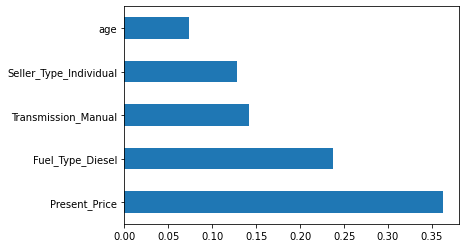

In [179]:
feature_importance.nlargest(5).plot(kind='barh')

In [194]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3)

In [195]:
display(X_train.shape, X_test.shape)

X.shape

(210, 8)

(91, 8)

(301, 8)

In [196]:
from sklearn.ensemble import RandomForestRegressor
rfrandom = RandomForestRegressor()

In [197]:
#hyperparameters 


print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [198]:
#Randomized searchCV

#number of decision trees
n_estimators= [int(x) for x in np.linspace(start=100 , stop=1200 , num=12) ]

#number of features to consider at every split 
max_features = ['auto','sqrt']

#max number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5 , stop=30 , num=6) ]

#minimun number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimun number of samples required to each leaf node
min_samples_leaf = [1,2,5,10]


random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [199]:
#base model to tune

rf =RandomForestRegressor()

In [200]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [201]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [216]:
rf_random.best_estimator_
# rf_random.best_score_

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [204]:
pred = rf_random.predict(X_test)

In [205]:
pred

array([ 0.60081553,  7.88244934,  0.83752043,  4.69204232,  0.61173203,
        4.60969774,  6.99693705,  3.82728702,  5.07252167,  0.94681683,
        3.89673084,  0.54054098,  2.7946422 ,  0.4262645 ,  4.62574732,
        2.912754  ,  5.52068384, 21.86111439,  0.55203165,  0.28904782,
        2.7946422 ,  9.66498841,  4.02613362,  2.77275155,  7.27803744,
       20.1030121 ,  5.48831254,  4.64756564,  0.55379858,  0.69826471,
       12.27132532,  2.4811682 ,  4.71095689,  4.76328424,  0.41426849,
        1.154465  ,  0.2410993 ,  1.15573127,  7.53711259,  5.48831254,
        4.13317655,  1.18841781,  1.15258233,  3.55805206,  1.18602682,
        1.7869666 ,  2.7946422 ,  4.61912808,  0.28698972,  2.46516   ,
        0.46559639,  6.64377953,  9.64819998,  4.71958237,  5.25354247,
       23.05198496,  8.82293739,  3.29055451,  5.37798661,  3.102144  ,
        4.76635441,  1.15573127,  0.28818514,  5.32681721,  6.58052912,
        7.30815346,  9.77182272,  9.74309612,  0.36641811,  0.26

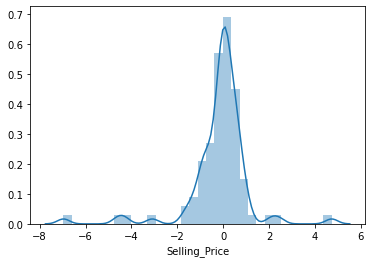

In [208]:
sns.distplot(y_test-pred)
# plt.scatter(y_test,pred)

In [207]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.7196580769845823
MSE: 1.7528915102213036
RMSE: 1.323968092599404


In [226]:
# import pickle

# file=open('random_forest_regressor_model.pkl','wb')

# #dump information to that file
# pickle.dump(rf_random,file)

In [227]:
# model = pickle.load(open('random_forest_regressor_model.pkl', 'rb'))

In [230]:
X_test

,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
170,0.83,5500,0,8,0,1,1,1
265,8.70,21200,0,3,0,1,0,1
136,1.20,23500,0,6,0,1,1,1
70,6.76,71000,0,6,1,0,0,1
138,0.87,15000,0,4,0,1,1,1
...,...,...,...,...,...,...,...,...
51,30.61,40000,0,5,1,0,0,0
0,5.59,27000,0,6,0,1,0,1
59,35.96,41000,0,6,1,0,0,0
228,9.40,60000,0,8,1,0,0,1


### Accuracy of car prediction model 

In [229]:
metrics.r2_score(y_test,pred)

0.924630158668492